In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

# Introduction
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

# Define the target questions

# Data Loading

In [2]:
df_list = []
with open("HomeCredit_columns_description.csv", 'r',errors='ignore') as file:
    reader = csv.reader(file)
    for row in reader:
        df_list.append(pd.DataFrame({'table_name':row[1],'col_name':row[2],\
                                     'description':row[3]},index=list('A')))
df_description = pd.concat(df_list,axis=0).reset_index()
df_description.drop(columns='index',inplace=True)

In [3]:
def view_description_columns(table,data=df_description,column=None):
    """
    view_description_columns(table,data=df_description,column=None) designed for columns descriptions check
    :param table:
    :param data:
    :param column:
    :return: The descriptions of each column for corresponding table
    """
    if column is not None:
        return data[(data['table_name']==table)&(df_description['col_name']==column)][['col_name','description']]
    else:
        return data[data['table_name']==table][['col_name','description']]
    

## Previsous Application Columns Description

In [4]:
# Read Previous Application table
previous_application = pd.read_csv('previous_application.csv')

In [5]:
previous_application_description = view_description_columns(table='previous_application.csv',data=df_description)

In [6]:
previous_application_description.head(10)

,col_name,description
174,SK_ID_PREV,ID of previous credit in Home credit related t...
175,SK_ID_CURR,ID of loan in our sample
176,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa..."
177,AMT_ANNUITY,Annuity of previous application
178,AMT_APPLICATION,For how much credit did client ask on the prev...
179,AMT_CREDIT,Final credit amount on the previous applicatio...
180,AMT_DOWN_PAYMENT,Down payment on the previous application
181,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...
182,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...
183,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...


## Installments Columns Description

In [7]:
installments  = pd.read_csv('installments_payments.csv')

In [8]:
installments_description = view_description_columns(table='installments_payments.csv',data=df_description)

In [9]:
installments_description.head(10)

,col_name,description
212,SK_ID_PREV,ID of previous credit in Home credit related t...
213,SK_ID_CURR,ID of loan in our sample
214,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...
215,NUM_INSTALMENT_NUMBER,On which installment we observe payment
216,DAYS_INSTALMENT,When the installment of previous credit was su...
217,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...
218,AMT_INSTALMENT,What was the prescribed installment amount of ...
219,AMT_PAYMENT,What the client actually paid on previous cred...


## POS_CASH_Balance Column Descriptions

In [10]:
pos_cash_bal = pd.read_csv('POS_CASH_balance.csv')

In [11]:
pos_cash_bal_description = view_description_columns(table='POS_CASH_balance.csv',data=df_description)

In [12]:
pos_cash_bal_description.head(10)

,col_name,description
143,SK_ID_PREV,ID of previous credit in Home Credit related t...
144,SK_ID_CURR,ID of loan in our sample
145,MONTHS_BALANCE,Month of balance relative to application date ...
146,CNT_INSTALMENT,Term of previous credit (can change over time)
147,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit
148,NAME_CONTRACT_STATUS,Contract status during the month
149,SK_DPD,DPD (days past due) during the month of previo...
150,SK_DPD_DEF,DPD during the month with tolerance (debts wit...


## Credit Card Balance Columns Description

In [13]:
credit_card_bal = pd.read_csv('credit_card_balance.csv')

In [14]:
credit_card_bal_description = view_description_columns('credit_card_balance.csv',data=df_description)

In [15]:
credit_card_bal_description.head(10)

,col_name,description
151,SK_ID_PREV,ID of previous credit in Home credit related t...
152,SK_ID_CURR,ID of loan in our sample
153,MONTHS_BALANCE,Month of balance relative to application date ...
154,AMT_BALANCE,Balance during the month of previous credit
155,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...
156,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...
157,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...
158,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...
159,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...
160,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...


## Bureau Columns description
- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [16]:
bureau = pd.read_csv('bureau.csv')

In [17]:
bureau_description = view_description_columns('bureau.csv',data=df_description)

In [18]:
bureau_description.head(10)

,col_name,description
123,SK_ID_CURR,ID of loan in our sample - one loan in our sam...
124,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...
125,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits
126,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit
127,DAYS_CREDIT,How many days before current application did c...
128,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...
129,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...
130,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...
131,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...
132,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...


## Bureau balance Columns Description
- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [19]:
bureau_bla = pd.read_csv('bureau_balance.csv')

In [20]:
bureau_bla_description = view_description_columns('bureau_balance.csv',data=df_description)

In [21]:
bureau_bla_description.head()

,col_name,description
140,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...
141,MONTHS_BALANCE,Month of balance relative to application date ...
142,STATUS,Status of Credit Bureau loan during the month ...


## Application Columns Description

In [22]:
application_train = pd.read_csv('application_train.csv')

In [23]:
application_test = pd.read_csv('application_test.csv')

In [24]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

### Missing Values Check and Imputation

In [25]:
from sklearn.impute import SimpleImputer
import missingno as mn

In [26]:
def missing_val_stat(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [27]:
def missing_value_check(data,threshold=0.5):

    print('Plotting missing values pattern for {}....'.format('data'))
    mn.matrix(data)
    plt.title('Missing Values Check for {} Table'.format('data'))
    plt.show()
    print('calculating for the total number of missing values in {} with threshold {} %....'.format('data',threshold*100))
    missing_value_check = missing_val_stat(data)
    missing_value_check.sort_values(by='Total', ascending=False, inplace=True)
    missing_value_check = missing_value_check[missing_value_check['Percent'] > threshold]
    print('The number of columns with over 50% missing values is: {}'.format(len(missing_value_check))) # print the number of columns with more than 50% missing values
    return missing_value_check

#### Missing Values Check

##### Missing Values Check for Application Table

Plotting missing values pattern for data....


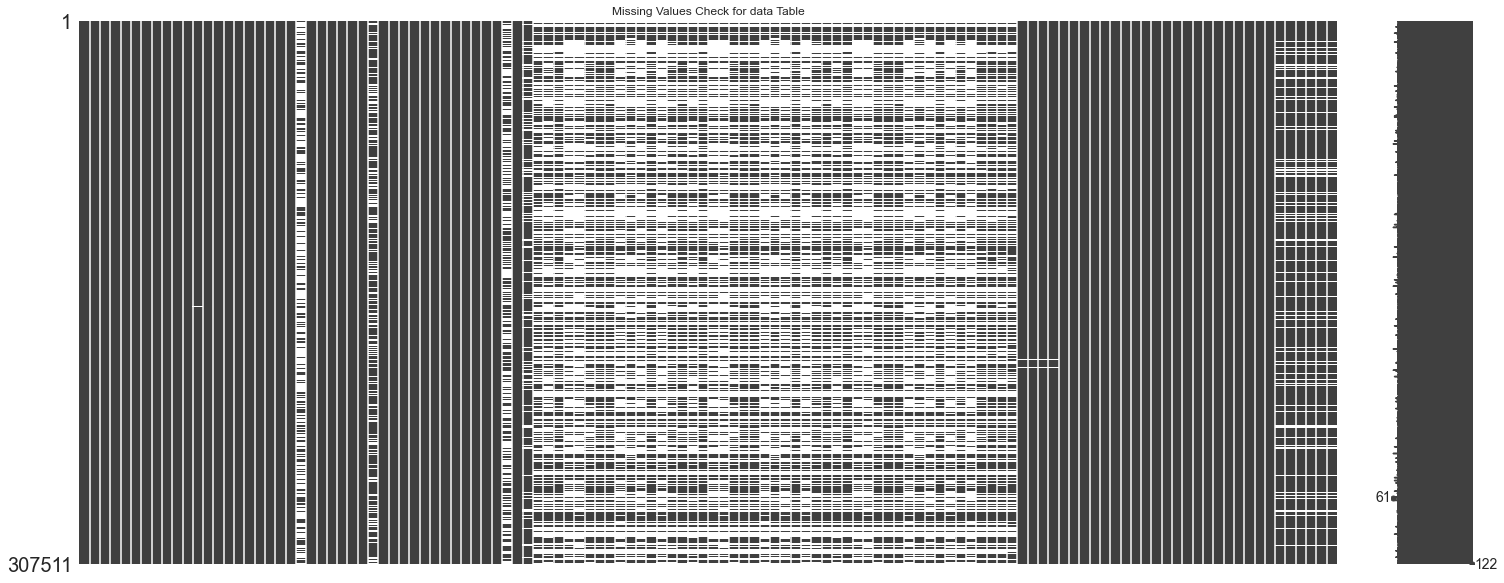

calculating for the total number of missing values in data with threshold 50.0 %....
The number of columns with over 50% missing values is: 57


,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [28]:
missing_value_check( application_train)

Plotting missing values pattern for data....


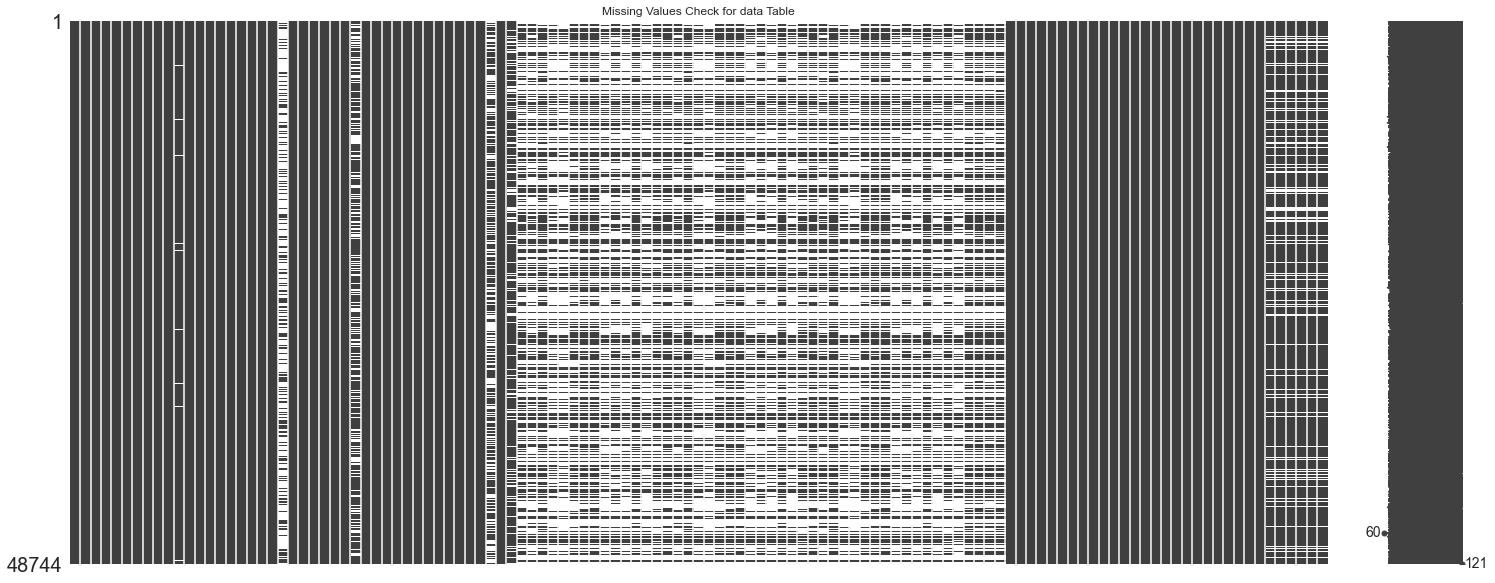

calculating for the total number of missing values in data with threshold 50.0 %....
The number of columns with over 50% missing values is: 58


,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [29]:
missing_value_check( application_test)

##### Missing Values Check for Previous Application Table

Plotting missing values pattern for data....


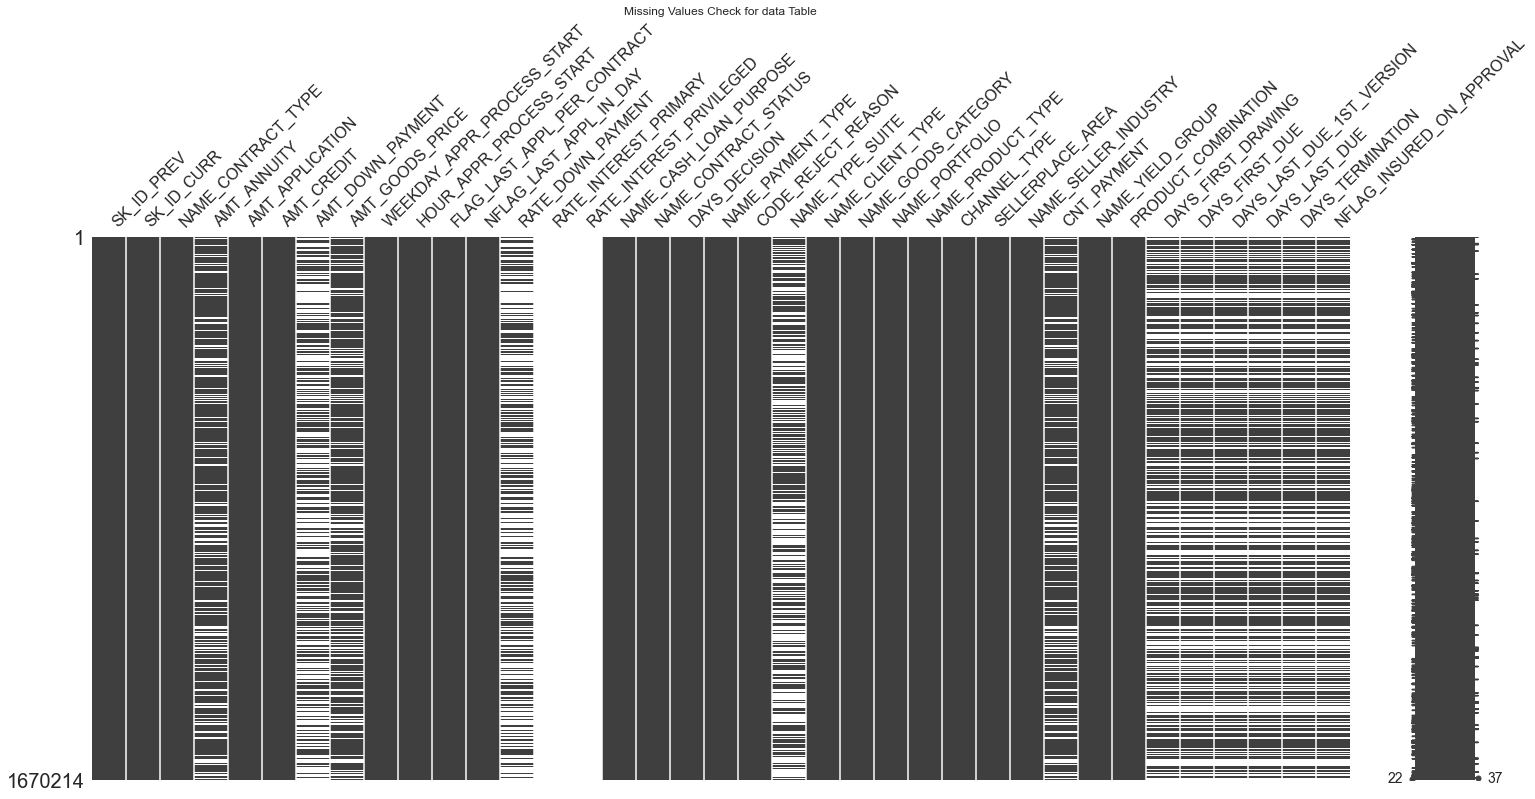

calculating for the total number of missing values in data with threshold 50.0 %....
The number of columns with over 50% missing values is: 14


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [30]:
missing_value_check(previous_application)

##### Missing Values Check for Bureau Table

Plotting missing values pattern for data....


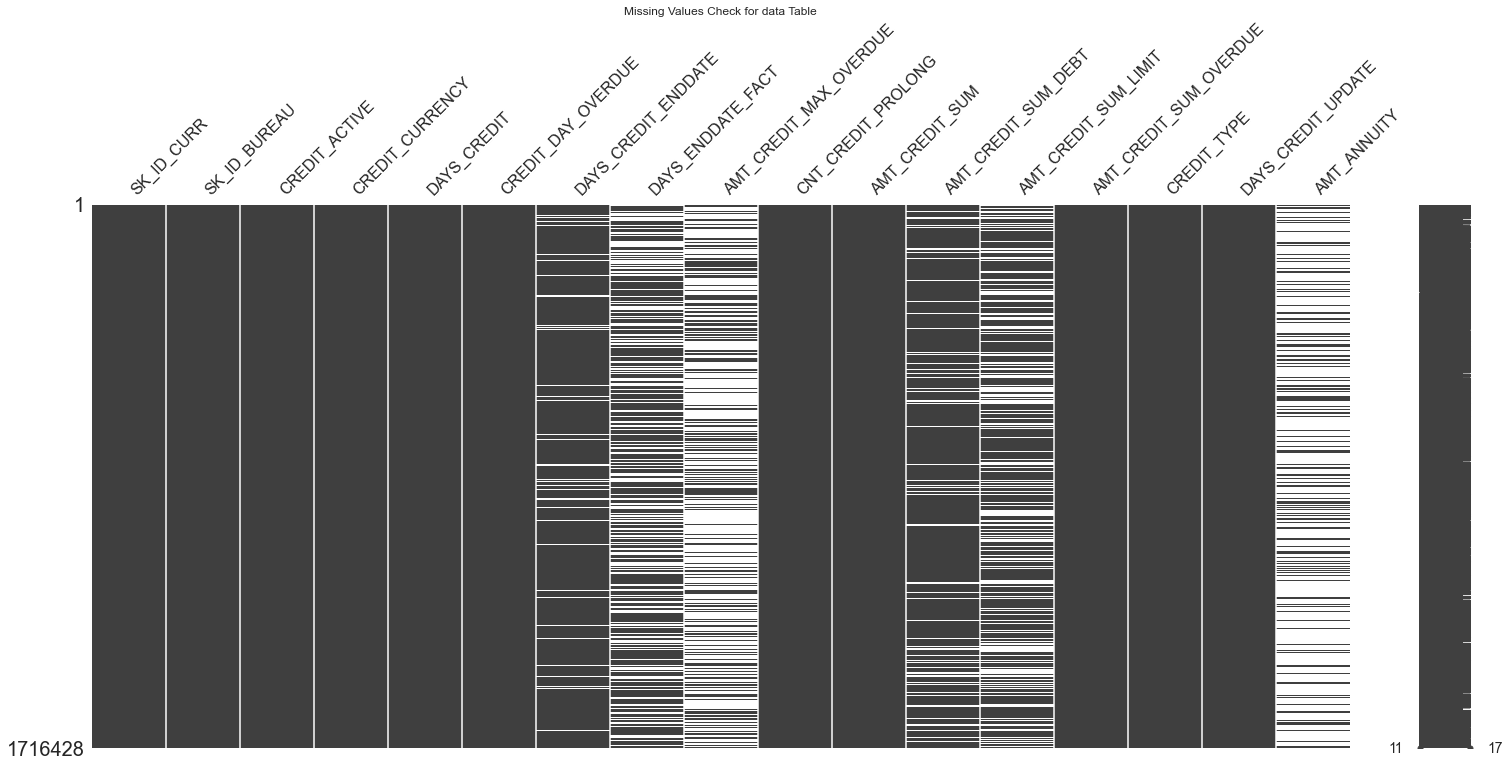

calculating for the total number of missing values in data with threshold 50.0 %....
The number of columns with over 50% missing values is: 6


,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573


In [31]:
missing_value_check(bureau)

#### Missing Values Imputation

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
def missing_value_imputation(data,cat_strategy = 'most_frequent',num_strategy = 'mean'):
    """
    missing_value_imputation(data,columns=None) designed for missing values imputation
    :param num_strategy:
    :param cat_strategy:
    :param data:
    :return:
    """
    total_missing_cnt = data.isnull().sum().sum()
    print('Before missing values imputation, the total number of missing values is: {}'.format(total_missing_cnt))
    cat_cols = data.select_dtypes(include=['object']).columns
    num_cols = data.select_dtypes(include=['int64','float64']).columns
    print('Creating missing values imputer for categorical columns....')
    cat_imputer = SimpleImputer(strategy= cat_strategy)
    print('Creating missing values imputer for numerical columns....')
    num_imputer = SimpleImputer(strategy= num_strategy)
    print('Fitting missing values imputer for categorical columns....')
    cat_imputer.fit(data[cat_cols])
    print('Fitting missing values imputer for numerical columns....')
    num_imputer.fit(data[num_cols])
    print('Transforming categorical columns....')
    data[cat_cols] = cat_imputer.transform(data[cat_cols])
    print('Transforming numerical columns....')
    data[num_cols] = num_imputer.transform(data[num_cols])
    total_missing_cnt = data.isnull().sum().sum()
    print('After missing values imputation, the total number of missing values is: {}'.format(total_missing_cnt))
    return data.isnull().sum().sum()

##### Missing Values Imputation for Application Table

In [34]:
missing_value_imputation(application_train,cat_strategy = 'most_frequent',num_strategy = 'mean')

Before missing values imputation, the total number of missing values is: 9152465
Creating missing values imputer for categorical columns....
Creating missing values imputer for numerical columns....
Fitting missing values imputer for categorical columns....
Fitting missing values imputer for numerical columns....
Transforming categorical columns....
Transforming numerical columns....
After missing values imputation, the total number of missing values is: 0


0

In [35]:
application_train.isnull().sum().sum()

0

In [36]:
missing_value_imputation(application_test,cat_strategy = 'most_frequent',num_strategy = 'mean')

Before missing values imputation, the total number of missing values is: 1404419
Creating missing values imputer for categorical columns....
Creating missing values imputer for numerical columns....
Fitting missing values imputer for categorical columns....
Fitting missing values imputer for numerical columns....
Transforming categorical columns....
Transforming numerical columns....
After missing values imputation, the total number of missing values is: 0


0

In [37]:
application_test.isnull().sum().sum()

0

##### Missing Values Imputation for Previous Application Table

In [38]:
missing_value_imputation(previous_application,cat_strategy = 'most_frequent',num_strategy = 'mean')

Before missing values imputation, the total number of missing values is: 11109336
Creating missing values imputer for categorical columns....
Creating missing values imputer for numerical columns....
Fitting missing values imputer for categorical columns....
Fitting missing values imputer for numerical columns....
Transforming categorical columns....
Transforming numerical columns....
After missing values imputation, the total number of missing values is: 0


0

##### Missing Values Imputation for Bureau Table

In [39]:
missing_value_imputation(bureau,cat_strategy = 'most_frequent',num_strategy = 'mean')

Before missing values imputation, the total number of missing values is: 3939947
Creating missing values imputer for categorical columns....
Creating missing values imputer for numerical columns....
Fitting missing values imputer for categorical columns....
Fitting missing values imputer for numerical columns....
Transforming categorical columns....
Transforming numerical columns....
After missing values imputation, the total number of missing values is: 0


0

### Duplicate Rows Check

In [40]:
def duplicate_rows_check(data):
    """
    duplicate_rows_check(data) designed for duplicate rows check
    :param data:
    :return:
    """
    print('Checking for duplicate rows in {}....'.format('data'))
    duplicate_rows_check = data.duplicated().sum()
    print('The number of duplicate rows is: {}'.format(duplicate_rows_check))

#### Duplicate Rows Check for Application Table

In [41]:
duplicate_rows_check(application_train)

Checking for duplicate rows in data....
The number of duplicate rows is: 0


In [42]:
duplicate_rows_check(application_test)

Checking for duplicate rows in data....
The number of duplicate rows is: 0


#### Duplicate Rows Check for Previous Application Table

In [43]:
duplicate_rows_check(previous_application)

Checking for duplicate rows in data....
The number of duplicate rows is: 0


#### Duplicate Rows Check for Bureau Table

In [44]:
duplicate_rows_check(bureau)

Checking for duplicate rows in data....
The number of duplicate rows is: 0


## Data Visualizations

### 1. Application Data

Application train

Application test

Overview Application dataset

In [45]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


##### 1.1 Distribution of Target Variable

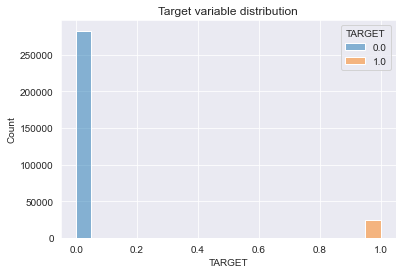

In [46]:
sns.histplot(x='TARGET',hue='TARGET',data=application_train,kde=False)
plt.title('Target variable distribution')
plt.show()

In [47]:
application_train_corr = application_train.corr().abs()
application_train_corr['TARGET'].sort_values(ascending=False).head(6)

TARGET                         1.000000
EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
EXT_SOURCE_1                   0.099152
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
Name: TARGET, dtype: float64

In [48]:
application_train.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [49]:
application_train.var().sort_values(ascending = False).head(10)

/var/folders/xy/406yv2ts4sqg09841vwh_phm0000gn/T/ipykernel_46060/2433356958.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_train.var().sort_values(ascending = False).head(10)


AMT_CREDIT                1.619988e+11
AMT_GOODS_PRICE           1.363673e+11
AMT_INCOME_TOTAL          5.622739e+10
DAYS_EMPLOYED             1.995884e+10
SK_ID_CURR                1.056582e+10
AMT_ANNUITY               2.100602e+08
DAYS_BIRTH                1.904440e+07
DAYS_REGISTRATION         1.241073e+07
DAYS_ID_PUBLISH           2.278441e+06
DAYS_LAST_PHONE_CHANGE    6.836101e+05
dtype: float64

##### 1.2 External Source

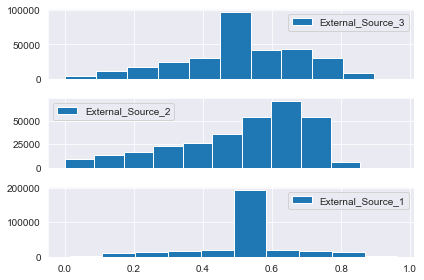

In [50]:
f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
ax1.hist(application_train['EXT_SOURCE_3'],label='External_Source_3')
ax1.legend()
ax2.hist(application_train['EXT_SOURCE_2'],label='External_Source_2')
ax2.legend()
ax3.hist(application_train['EXT_SOURCE_1'],label='External_Source_1')
ax3.legend()
plt.tight_layout()
plt.show()

##### 1.3 DAYS_BIRTH

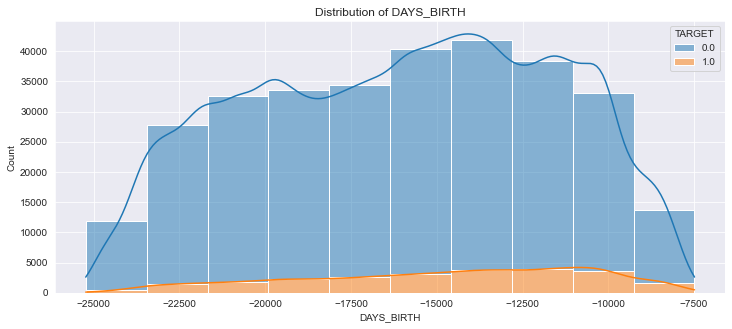

In [51]:
plt.figure(figsize=(12,5))
sns.histplot(x = 'DAYS_BIRTH',bins = 10,kde=True,
             hue='TARGET',data=application_train,multiple='stack')
plt.title("Distribution of DAYS_BIRTH")
plt.show()

##### 1.4 REGION_RATING_CLIENT_W_CITY

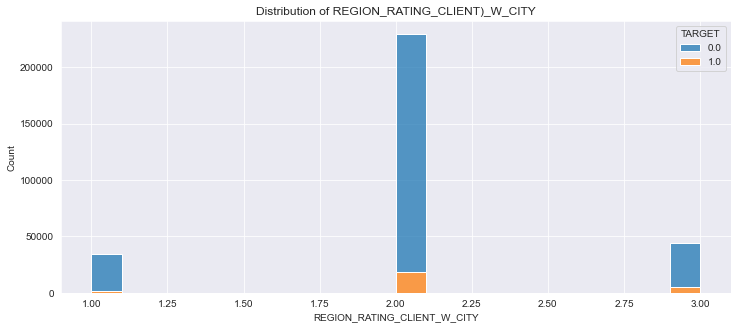

In [52]:
plt.figure(figsize=(12,5))
sns.histplot(x='REGION_RATING_CLIENT_W_CITY',hue='TARGET',data=application_train,multiple='stack')
plt.title("Distribution of REGION_RATING_CLIENT)_W_CITY")
plt.show()

##### 1.5 NAME_INCOME_TYPE

<Figure size 864x360 with 0 Axes>

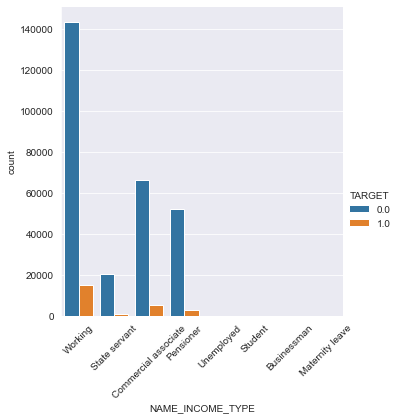

In [53]:
plt.figure(figsize=(12,5))
sns.catplot(data=application_train,x='NAME_INCOME_TYPE',kind='count',hue='TARGET')
plt.xticks(rotation=45)
plt.show()

<Figure size 864x360 with 0 Axes>

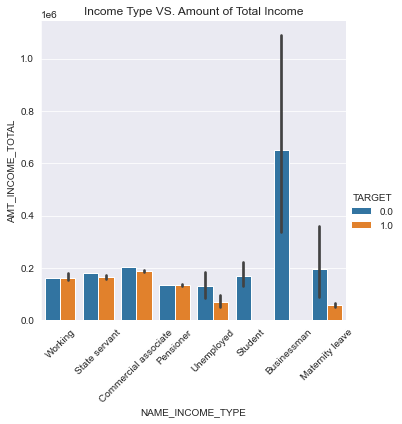

In [54]:
plt.figure(figsize=(12,5))
sns.catplot(data=application_train,x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL'
            ,hue='TARGET',kind='bar')
plt.xticks(rotation=45)
plt.title('Income Type VS. Amount of Total Income')
plt.show()

##### 1.6 NAME_EDUCATION_TYPE

<Figure size 864x360 with 0 Axes>

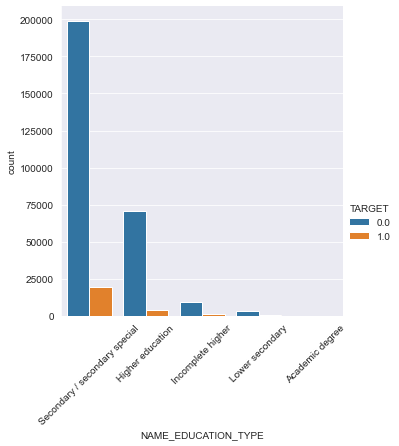

In [55]:
plt.figure(figsize=(12,5))
sns.catplot(data=application_train,x='NAME_EDUCATION_TYPE',kind='count',hue='TARGET')
plt.xticks(rotation=45)
plt.show()

<Figure size 864x360 with 0 Axes>

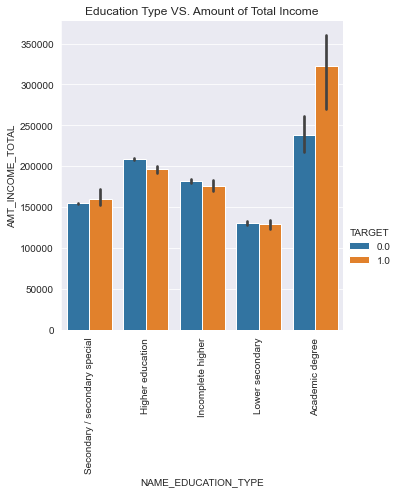

In [56]:
plt.figure(figsize=(12,5))
sns.catplot(data=application_train,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL'
            ,hue='TARGET',kind='bar',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

##### 1.7 NAME_FAMILY_STATUS

<Figure size 864x360 with 0 Axes>

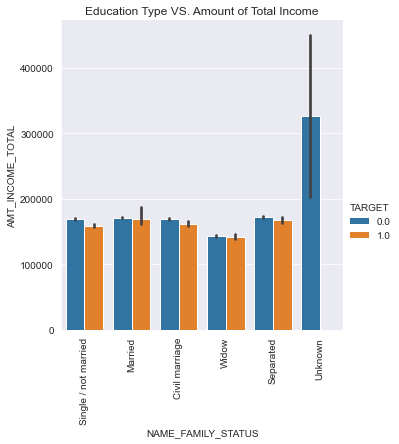

In [57]:
plt.figure(figsize=(12,5))
sns.catplot(data=application_train,x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL'
            ,hue='TARGET',kind='bar',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

##### 1.8 OCCUPATION_TYPE

<Figure size 1440x720 with 0 Axes>

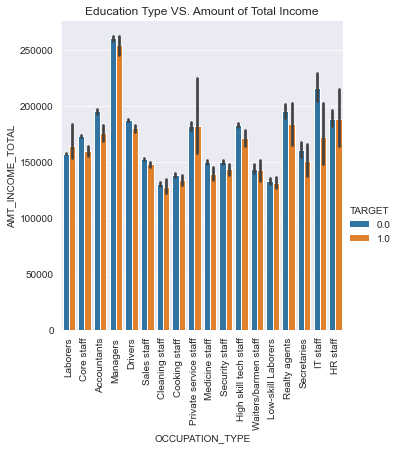

In [58]:
plt.figure(figsize=(20,10))
sns.catplot(data=application_train,x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL'
            ,hue='TARGET',kind='bar',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

##### 1.9 ORGANIZATION_TYPE

<Figure size 2160x1440 with 0 Axes>

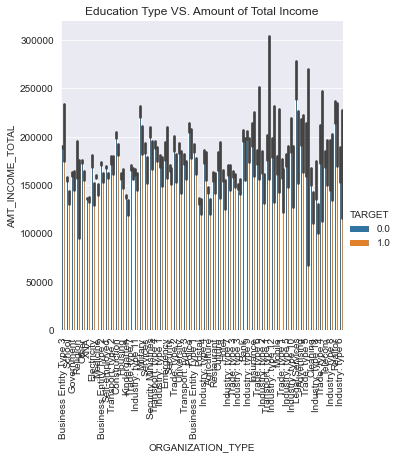

In [59]:
plt.figure(figsize=(30,20))
sns.catplot(data=application_train,x='ORGANIZATION_TYPE',y='AMT_INCOME_TOTAL'
            ,hue='TARGET',kind='bar',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

##### 1.10 WEEKDAY_APPR_PROCESS_START

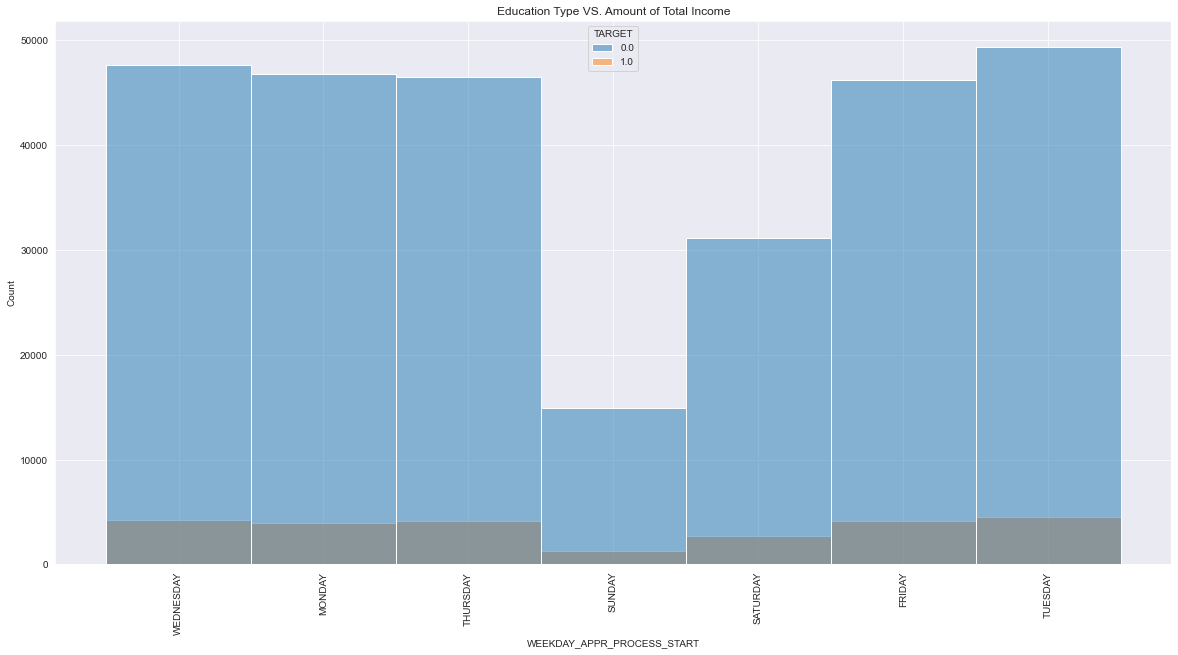

In [60]:
plt.figure(figsize=(20,10))
sns.histplot(data=application_train,x='WEEKDAY_APPR_PROCESS_START'
            ,hue='TARGET')
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

### 2. Bureau Data

Bureau data contains all client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in the sample). For every loan in the sample, there are as many rows as number of credits the client had in Credit Bureau before the application date. SK_ID_CURR is the key connecting application_train|test data with bureau data.

Let's merge application_train with bureau.

In [61]:
bureau_application = bureau.merge(application_train, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [62]:
bureau_application_corr = bureau_application.corr().abs()

bureau_application_corr_col = list(bureau.columns)
bureau_application_corr_col.append('TARGET')

bureau_application_corr[bureau_application_corr.columns.
                        isin(bureau_application_corr_col)]['TARGET'].sort_values(ascending = False)

TARGET                    1.000000
DAYS_CREDIT               0.061556
DAYS_CREDIT_UPDATE        0.041076
DAYS_ENDDATE_FACT         0.029503
DAYS_CREDIT_ENDDATE       0.025442
AMT_CREDIT_SUM            0.010606
SK_ID_BUREAU              0.009018
AMT_CREDIT_SUM_OVERDUE    0.006253
AMT_CREDIT_SUM_LIMIT      0.004886
SK_ID_CURR                0.003024
CREDIT_DAY_OVERDUE        0.002652
AMT_CREDIT_SUM_DEBT       0.002343
CNT_CREDIT_PROLONG        0.001523
AMT_CREDIT_MAX_OVERDUE    0.000954
Name: TARGET, dtype: float64

In [63]:
bureau.select_dtypes(include='object').columns

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')

In [64]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

##### 2.1 CREDIT_TYPE

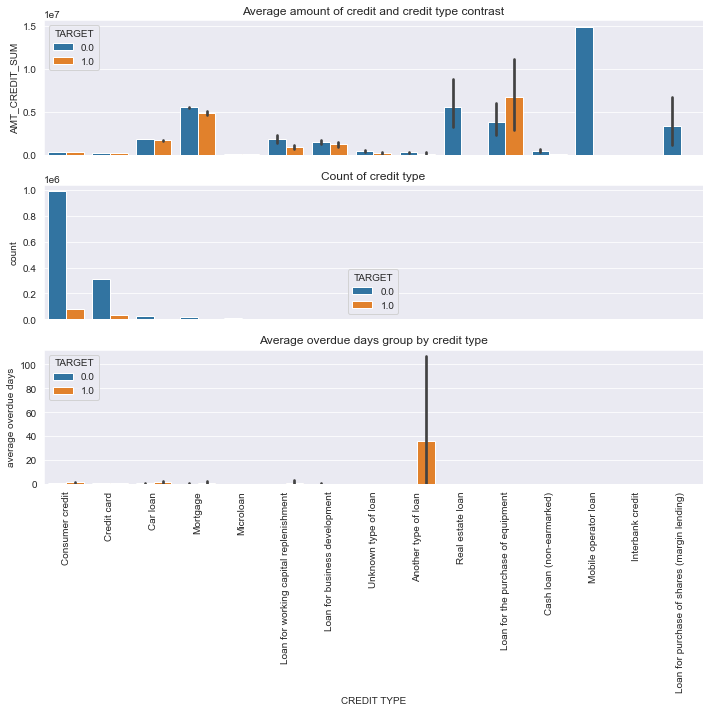

In [65]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,sharex=True,figsize= (10,10))
plt.subplot(3,1,1)
sns.barplot(data = bureau_application,x = 'CREDIT_TYPE',y='AMT_CREDIT_SUM',estimator=np.mean,ax = ax1,hue='TARGET')
plt.xticks(rotation = 90)
ax1.xaxis.set_visible(False)
plt.title('Average amount of credit and credit type contrast')
plt.subplot(3,1,2)
sns.countplot(data= bureau_application, x='CREDIT_TYPE',ax = ax2,hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Count of credit type')
ax2.xaxis.set_visible(False)
plt.subplot(3,1,3)
sns.barplot(data= bureau_application, x = 'CREDIT_TYPE', y = 'CREDIT_DAY_OVERDUE', estimator=np.mean,ax = ax3,hue='TARGET')
plt.xticks(rotation = 90)
plt.xlabel('CREDIT TYPE')
plt.title('Average overdue days group by credit type')
plt.ylabel('average overdue days')
plt.tight_layout()
plt.show()

##### 2.2 CREDIT_CURRENCY

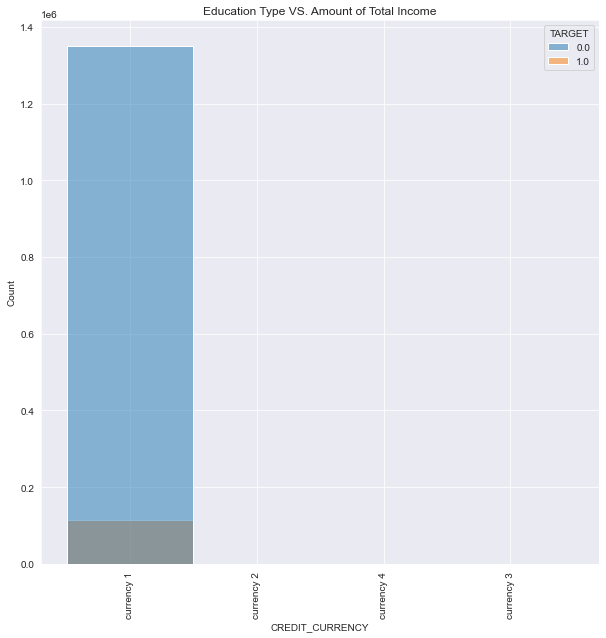

In [66]:
plt.figure(figsize=(10,10))
sns.histplot(data=bureau_application,x='CREDIT_CURRENCY'
            ,hue='TARGET')
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

In [67]:
currency_default_cnt = pd.DataFrame(bureau_application.groupby(['CREDIT_CURRENCY'])['TARGET'].value_counts())
currency_default_cnt['PERCENT'] = bureau_application.groupby(['CREDIT_CURRENCY'])['TARGET']\
.value_counts(normalize=True).values
currency_default_cnt

TARGET   PERCENT
CREDIT_CURRENCY TARGET                   
currency 1      0.0     1349640  0.921826
                1.0      114454  0.078174
currency 2      0.0        1023  0.954291
                1.0          49  0.045709
currency 3      0.0         133  0.886667
                1.0          17  0.113333
currency 4      0.0           9  1.000000

### 3.Previous Application Data

The dataframe previous_application contains information about all previous applications for Home Credit loans of clients who have loans in the sample. There is one row for each previous application related to loans in our data sample. SK_ID_CURR is the key connecting application_train|test data with previous_application data.

Let's merge application_train with previous_application.

In [68]:
previous_application_application = previous_application.merge(application_train, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [69]:
previous_application_application_corr = previous_application_application.corr().abs()

previous_application_application_corr_col = list(previous_application.columns)
previous_application_application_corr_col.append('TARGET')



In [70]:
previous_application_application_corr[previous_application_application_corr.columns.
                        isin(previous_application_application_corr_col)]['TARGET'].\
sort_values(ascending=False).head(5)

TARGET                1.000000
DAYS_DECISION         0.039901
CNT_PAYMENT           0.026536
DAYS_FIRST_DRAWING    0.022802
RATE_DOWN_PAYMENT     0.017041
Name: TARGET, dtype: float64

In [71]:
previous_application.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

##### 3.1 DAYS_DECISION

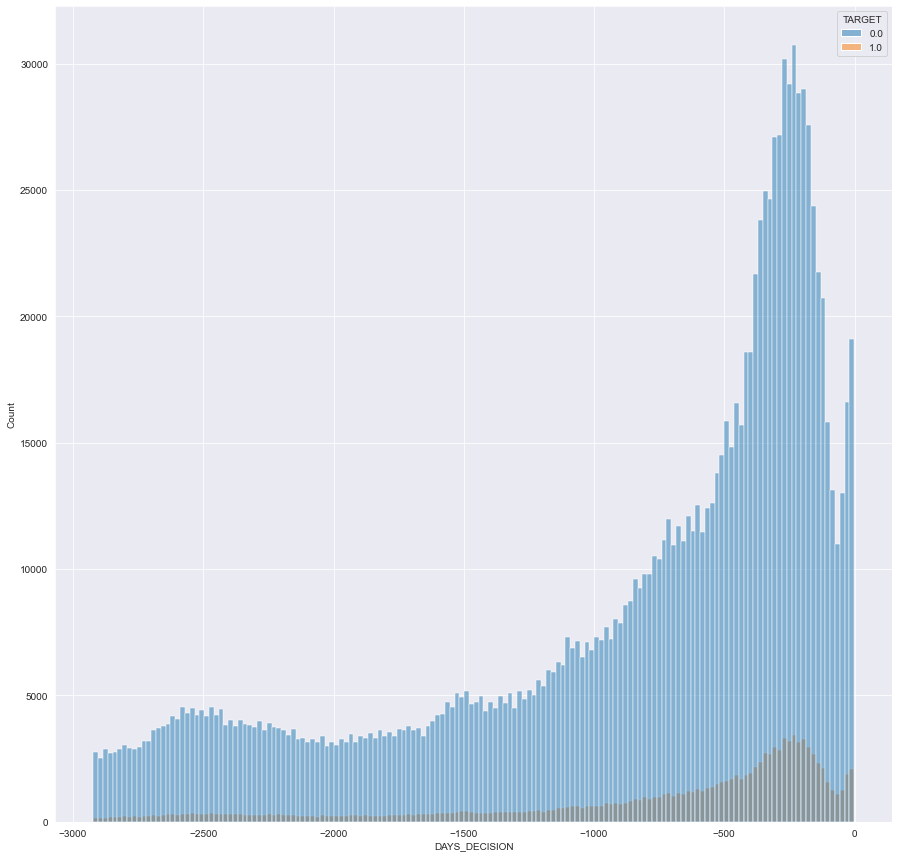

In [72]:
plt.figure(figsize=(15,15))
sns.histplot(x='DAYS_DECISION',data=previous_application_application,hue='TARGET')
plt.show()

##### 3.2 CNT_PAYMENT

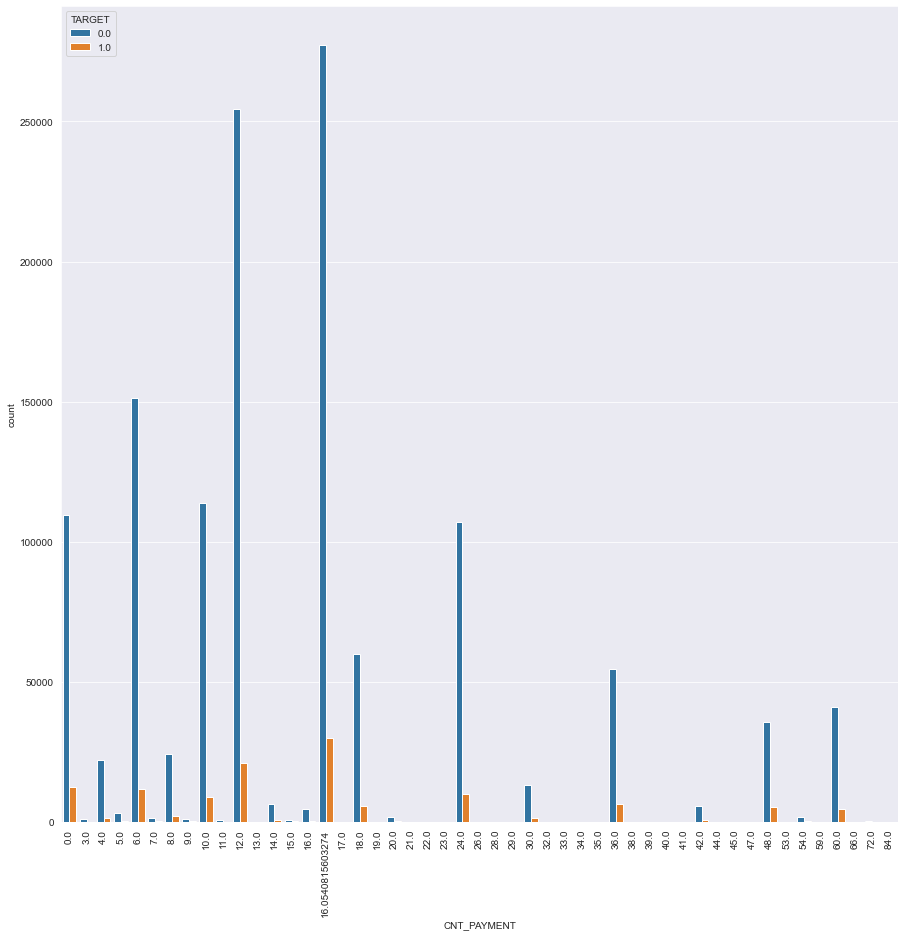

In [73]:
plt.figure(figsize=(15,15))
sns.countplot(x='CNT_PAYMENT',data=previous_application_application,hue='TARGET')
plt.xticks(rotation = 90)
plt.show()

##### 3.3 NAME_CONTRACT_TYPE

<Figure size 2160x1440 with 0 Axes>

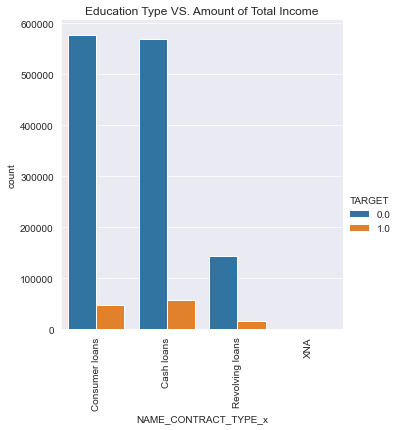

In [74]:
plt.figure(figsize=(30,20))
sns.catplot(data=previous_application_application,x='NAME_CONTRACT_TYPE_x'
            ,hue='TARGET',kind='count')
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

##### 3.4 CODE_REJECT_REASON

<Figure size 2160x1440 with 0 Axes>

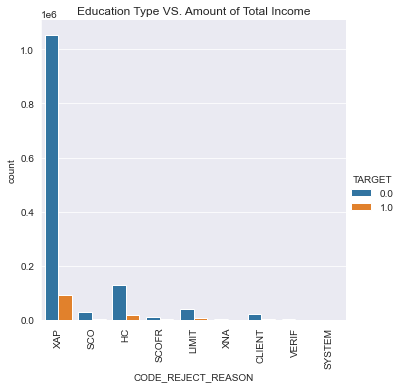

In [75]:
plt.figure(figsize=(30,20))
sns.catplot(data=previous_application_application,x='CODE_REJECT_REASON'
            ,hue='TARGET',kind='count')
plt.xticks(rotation=90)
plt.title('Education Type VS. Amount of Total Income')
plt.show()

#### 3.5 Amount customers previously requested VS. Amount customers finally got approved

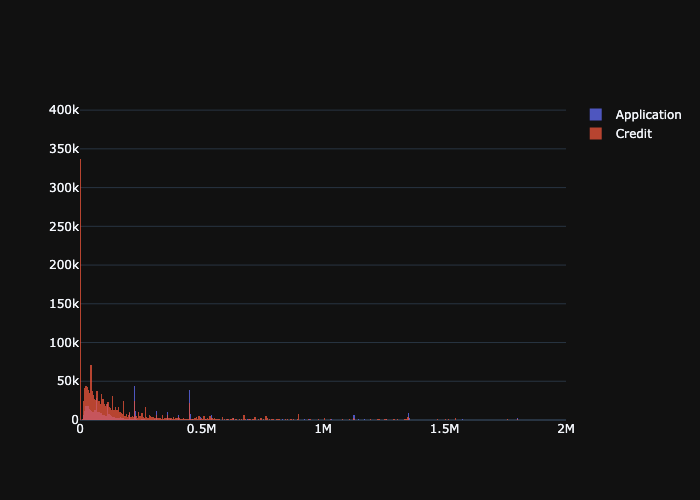

In [76]:
# import plotly.graph_objects as go
import plotly.graph_objects as go
# Extract the specific columns we want to plot
x0 =previous_application['AMT_APPLICATION']
x1 =previous_application['AMT_CREDIT']
# Initialize the figure
fig = go.Figure()
# Add the histogram trace
fig.add_trace(go.Histogram(x=x0,name='Application'))
fig.add_trace(go.Histogram(x=x1,name='Credit'))
# Update the layout
fig.update_layout(barmode='overlay')
fig.update_traces(opacity = 0.75)
fig.update_xaxes(range=[0,2000000])
# Show the figure
fig.show('png')

#### 3.6 Average goods price

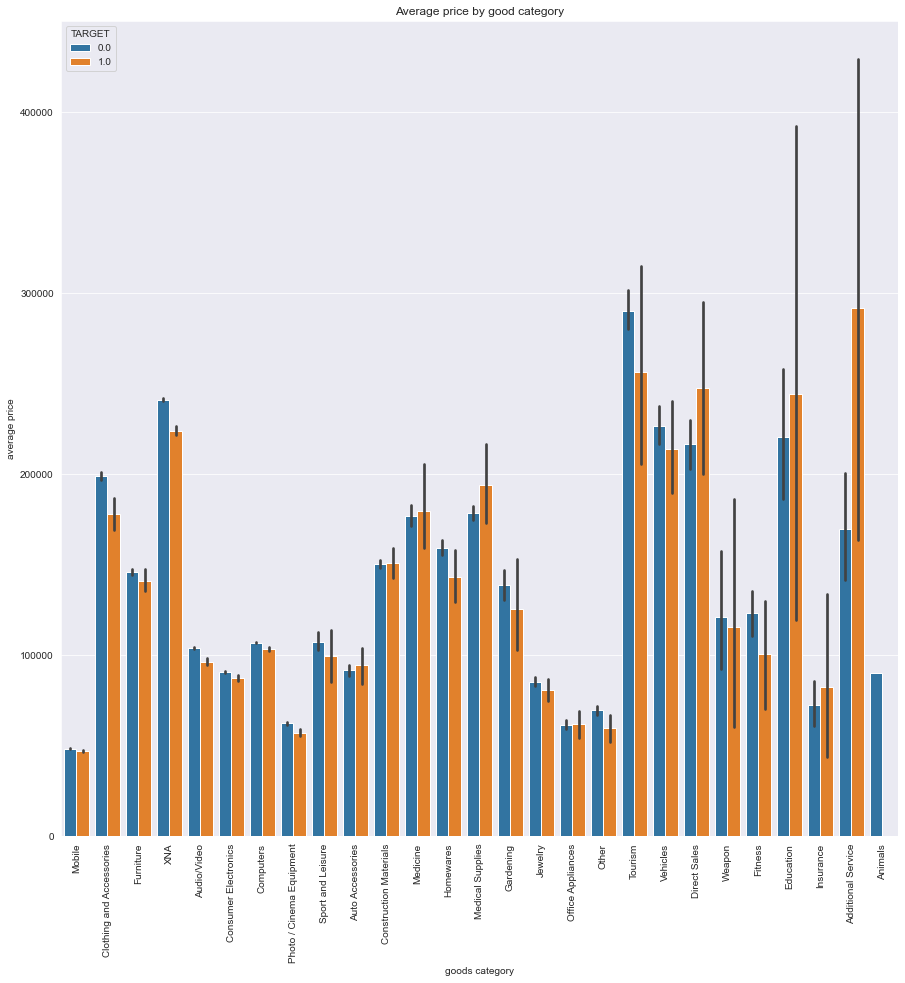

In [77]:
# Set figure size
plt.figure(figsize=(15,15))
# Plot bar graph
sns.barplot(data= previous_application_application,x='NAME_GOODS_CATEGORY',y = 'AMT_APPLICATION',hue='TARGET', estimator= np.mean)
# Rotate x-axis labels
plt.xticks(rotation = 90)
# Add x-axis label
plt.xlabel('goods category')
# Add y-axis label
plt.ylabel('average price')
# Add title
plt.title('Average price by good category')
# Show graphic
plt.show()

#### 3.7 NAME_CASH_LOAN_PURPOSE

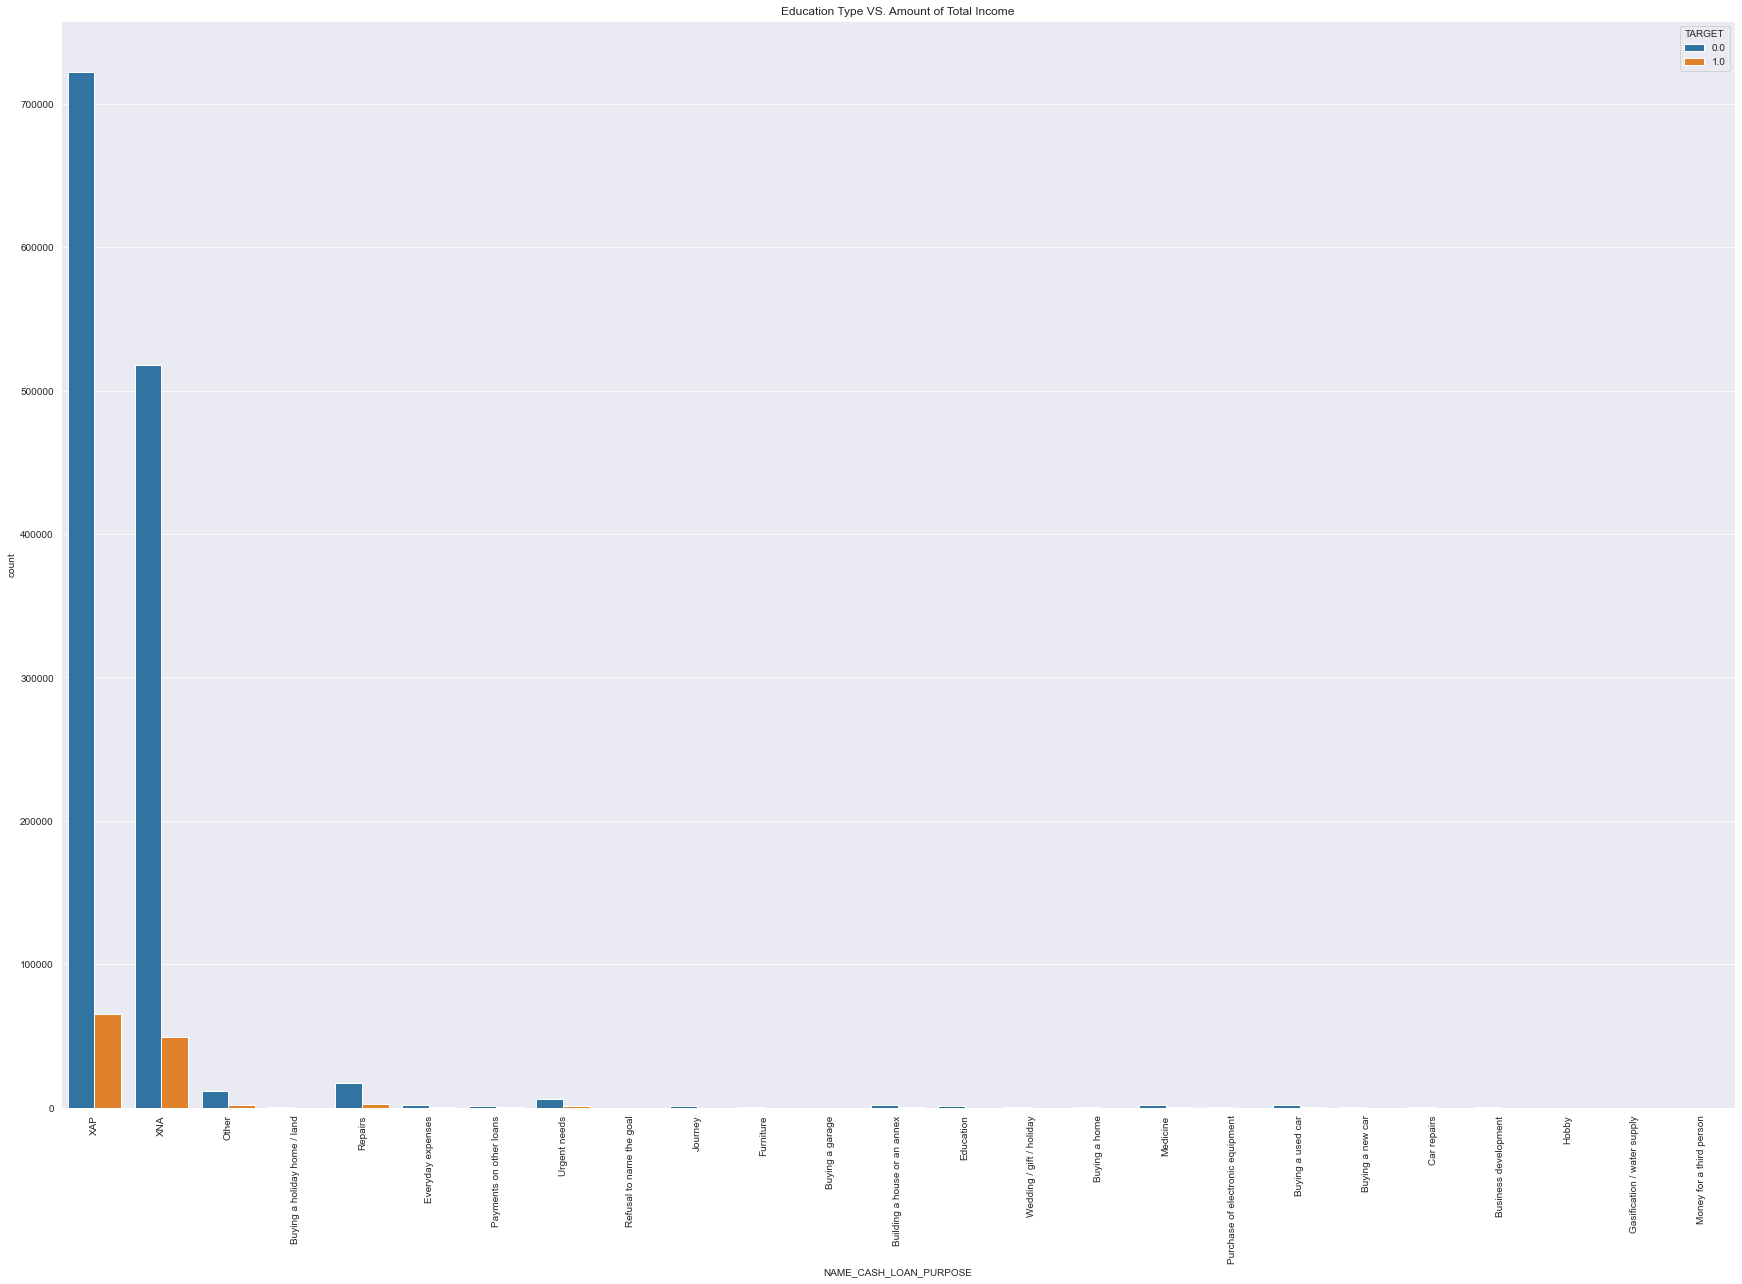

In [78]:
# Set the figure size
plt.figure(figsize=(30,20))
# Plot the data using seaborn's count_plot function.
sns.countplot(data=previous_application_application,x='NAME_CASH_LOAN_PURPOSE'
            ,hue='TARGET')
# Set the x-ticks to be rotated.
plt.xticks(rotation=90)
# Set the title of the plot.
plt.title('Education Type VS. Amount of Total Income')
# Display the plot.
plt.show()

# Feature Engineering

## Categorical-to-Numerical conversion
Before we look at the modeling, we need to learn about ways to represent categorical data as numerical data.

Most of the scikit-learn models require numerical inputs, but we have a number of ways to convert data.

### One-Hot Encoding
One method of changing categorical values into numerical values (appropriate for when there is no inherent order to the categories) is called "one-hot" encoding. This takes a single column of categorical data with k categories and transforms it into k columns of binary 0/1 data, one column for each of the unique category values that existed in the column. Each row will have a $1$ in the column corresponding to its original categorical value, and a $0$ in all the other columns.

Pandas comes with an easy, built-in method for carrying out this one-hot encoding process: `pd.get_dummies()`. It takes as input a Series (or DataFrame), and outputs a DataFrame with the categorical columns converted into sets of one-hot-encoded columns. (Any numerical columns are left unchanged.)

Scikit-learn implements this slightly differently than pandas, via the `OneHotEncoder` as we shall see shortly.

### Label Encoding
The other major type of categorical-to-numerical encoding is called Label Encoding. This is suitable for when the categories have some inherent ordering to them, (i.e. the data is ordinal, not nominal). We can exploit this ordinality to make smarter encodings.

In [79]:
# import the one-hot encoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [80]:
def classes_count(df):
    """
    This function counts the number of classes in each categorical column
    :param df:
    :return: categorical columns with number of classes
    """
    cat_cols_classes= {}
    cnt = 0
    for column in df.select_dtypes(include='object').columns:
        cat_cols_classes[column] = df[column].unique()
        cnt += 1
        print(column+' has '+str(len(cat_cols_classes[column]))+' classes')
    print(f'{cnt} categorical columns found')
    return cat_cols_classes




In [81]:
def onehot_encode(df,onehot_cols = None):

    # Initialize the one-hot encoder
    enc = OneHotEncoder(handle_unknown='ignore',drop='first')
    if onehot_cols is None:
        onehot_cols = df.select_dtypes(include='object').columns
    print('This dataframe has '+str(len(df.select_dtypes(include='object').columns))+' categorical columns')
    print('We weill one-hot encode the '+str(len(onehot_cols))+' categorical columns')
    # Apply one-hot encoding to each column with categorical data
    for col in onehot_cols:
        print(f'Encoding column {col} which has {df[col].nunique()} unique classes')
        sub = pd.DataFrame(df[col])
        encoded = enc.fit_transform(sub)
        encoded_df = pd.DataFrame(encoded.toarray(), columns=enc.categories_[0][1:], dtype=int)
        # Rename the columns using the original column names
        encoded_df = encoded_df.add_prefix(col + '_')
        # Remove the old column
        df.drop(columns=col, inplace=True)
        # Concatenate the new columns to the dataframe
        df = pd.concat([df, encoded_df], axis=1)
    return df



In [82]:
def labelencoder (df,label_cols,mapping_list):

    print('This dataframe has '+str(len(df.select_dtypes(include='object').columns))+' categorical columns')
    print('We weill label encode the '+str(len(label_cols))+' categorical columns')
    # Initialize the label encoder
    enc = LabelEncoder()
    # Loop through each column and apply label encoding
    for col in label_cols:
        print(f'Encoding column {col} which has {df[col].nunique()} unique classes')
        sub = df[col].ravel()
        # Fit the label encoder to the data
        encoded = enc.fit(mapping[col])
        encoded_df = pd.DataFrame(encoded.transform(sub))
        # Rename the columns using the original column names
        encoded_df = encoded_df.add_prefix(col + '_')
        #Concatenate the new columns to the dataframe
        df = pd.concat([df, encoded_df], axis=1)
        #Remove the old column
        df.drop(columns=col, inplace=True)

    return df

### Application categorical columns conversion to numerical columns

In [83]:
classes_count(application_train)

NAME_CONTRACT_TYPE has 2 classes
CODE_GENDER has 3 classes
FLAG_OWN_CAR has 2 classes
FLAG_OWN_REALTY has 2 classes
NAME_TYPE_SUITE has 7 classes
NAME_INCOME_TYPE has 8 classes
NAME_EDUCATION_TYPE has 5 classes
NAME_FAMILY_STATUS has 6 classes
NAME_HOUSING_TYPE has 6 classes
OCCUPATION_TYPE has 18 classes
WEEKDAY_APPR_PROCESS_START has 7 classes
ORGANIZATION_TYPE has 58 classes
FONDKAPREMONT_MODE has 4 classes
HOUSETYPE_MODE has 3 classes
WALLSMATERIAL_MODE has 7 classes
EMERGENCYSTATE_MODE has 2 classes
16 categorical columns found


{'NAME_CONTRACT_TYPE': array(['Cash loans', 'Revolving loans'], dtype=object),
 'CODE_GENDER': array(['M', 'F', 'XNA'], dtype=object),
 'FLAG_OWN_CAR': array(['N', 'Y'], dtype=object),
 'FLAG_OWN_REALTY': array(['Y', 'N'], dtype=object),
 'NAME_TYPE_SUITE': array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
        'Other_A', 'Other_B', 'Group of people'], dtype=object),
 'NAME_INCOME_TYPE': array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
        'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
       dtype=object),
 'NAME_EDUCATION_TYPE': array(['Secondary / secondary special', 'Higher education',
        'Incomplete higher', 'Lower secondary', 'Academic degree'],
       dtype=object),
 'NAME_FAMILY_STATUS': array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
        'Separated', 'Unknown'], dtype=object),
 'NAME_HOUSING_TYPE': array(['House / apartment', 'Rented apartment', 'With parents',
        'Municipal apartment'

In [84]:
application_label_encode_col = ['WEEKDAY_APPR_PROCESS_START','NAME_EDUCATION_TYPE']

In [85]:
mapping_weekday = ['MONDAY','TUESDAY','WEDNESDAY', 'THURSDAY','FRIDAY','SATURDAY','SUNDAY']
mapping_education = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']

In [86]:
mapping = {'NAME_EDUCATION_TYPE':mapping_education,'WEEKDAY_APPR_PROCESS_START':mapping_weekday}

#### One-Hot Encoding

In [87]:
application_one_hot_cols = application_train.select_dtypes(include='object').columns.difference(application_label_encode_col)
application_one_hot_cols

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [88]:
application_train_encoded = onehot_encode(application_train,application_one_hot_cols)

This dataframe has 16 categorical columns
We weill one-hot encode the 14 categorical columns
Encoding column CODE_GENDER which has 3 unique classes
Encoding column EMERGENCYSTATE_MODE which has 2 unique classes
Encoding column FLAG_OWN_CAR which has 2 unique classes
Encoding column FLAG_OWN_REALTY which has 2 unique classes
Encoding column FONDKAPREMONT_MODE which has 4 unique classes
Encoding column HOUSETYPE_MODE which has 3 unique classes
Encoding column NAME_CONTRACT_TYPE which has 2 unique classes
Encoding column NAME_FAMILY_STATUS which has 6 unique classes
Encoding column NAME_HOUSING_TYPE which has 6 unique classes
Encoding column NAME_INCOME_TYPE which has 8 unique classes
Encoding column NAME_TYPE_SUITE which has 7 unique classes
Encoding column OCCUPATION_TYPE which has 18 unique classes
Encoding column ORGANIZATION_TYPE which has 58 unique classes
Encoding column WALLSMATERIAL_MODE which has 7 unique classes


In [89]:
application_train_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,0.018801,-9461.0,...,0,0,0,0,0,0,0,0,1,0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,Higher education,0.003541,-16765.0,...,0,0,0,0,0,0,0,0,0,0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,0.010032,-19046.0,...,0,0,0,0,0,0,0,1,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,0.008019,-19005.0,...,0,0,0,0,0,0,0,1,0,0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,0.028663,-19932.0,...,0,0,0,0,0,0,0,1,0,0


#### Label Encoding

In [90]:
application_train_lencoded = labelencoder(application_train_encoded,application_label_encode_col,mapping)

This dataframe has 2 categorical columns
We weill label encode the 2 categorical columns
Encoding column WEEKDAY_APPR_PROCESS_START which has 7 unique classes
Encoding column NAME_EDUCATION_TYPE which has 5 unique classes


### Previous application categorical columns conversion to numerical columns

#### One-Hot Encoding

In [91]:
classes_count(previous_application_application)

NAME_CONTRACT_TYPE_x has 4 classes
WEEKDAY_APPR_PROCESS_START_x has 7 classes
FLAG_LAST_APPL_PER_CONTRACT has 2 classes
NAME_CASH_LOAN_PURPOSE has 25 classes
NAME_CONTRACT_STATUS has 4 classes
NAME_PAYMENT_TYPE has 4 classes
CODE_REJECT_REASON has 9 classes
NAME_TYPE_SUITE_x has 7 classes
NAME_CLIENT_TYPE has 4 classes
NAME_GOODS_CATEGORY has 27 classes
NAME_PORTFOLIO has 5 classes
NAME_PRODUCT_TYPE has 3 classes
CHANNEL_TYPE has 8 classes
NAME_SELLER_INDUSTRY has 11 classes
NAME_YIELD_GROUP has 5 classes
PRODUCT_COMBINATION has 17 classes
NAME_CONTRACT_TYPE_y has 2 classes
CODE_GENDER has 3 classes
FLAG_OWN_CAR has 2 classes
FLAG_OWN_REALTY has 2 classes
NAME_TYPE_SUITE_y has 7 classes
NAME_INCOME_TYPE has 7 classes
NAME_EDUCATION_TYPE has 5 classes
NAME_FAMILY_STATUS has 5 classes
NAME_HOUSING_TYPE has 6 classes
OCCUPATION_TYPE has 18 classes
WEEKDAY_APPR_PROCESS_START_y has 7 classes
ORGANIZATION_TYPE has 58 classes
FONDKAPREMONT_MODE has 4 classes
HOUSETYPE_MODE has 3 classes
WALLS

{'NAME_CONTRACT_TYPE_x': array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
       dtype=object),
 'WEEKDAY_APPR_PROCESS_START_x': array(['SATURDAY', 'SUNDAY', 'THURSDAY', 'WEDNESDAY', 'TUESDAY', 'FRIDAY',
        'MONDAY'], dtype=object),
 'FLAG_LAST_APPL_PER_CONTRACT': array(['Y', 'N'], dtype=object),
 'NAME_CASH_LOAN_PURPOSE': array(['XAP', 'XNA', 'Other', 'Buying a holiday home / land', 'Repairs',
        'Everyday expenses', 'Payments on other loans', 'Urgent needs',
        'Refusal to name the goal', 'Journey', 'Furniture',
        'Buying a garage', 'Building a house or an annex', 'Education',
        'Wedding / gift / holiday', 'Buying a home', 'Medicine',
        'Purchase of electronic equipment', 'Buying a used car',
        'Buying a new car', 'Car repairs', 'Business development', 'Hobby',
        'Gasification / water supply', 'Money for a third person'],
       dtype=object),
 'NAME_CONTRACT_STATUS': array(['Approved', 'Refused', 'Canceled', 'Unused offer

In [92]:
previous_application_encoded = onehot_encode(previous_application)

This dataframe has 16 categorical columns
We weill one-hot encode the 16 categorical columns
Encoding column NAME_CONTRACT_TYPE which has 4 unique classes
Encoding column WEEKDAY_APPR_PROCESS_START which has 7 unique classes
Encoding column FLAG_LAST_APPL_PER_CONTRACT which has 2 unique classes
Encoding column NAME_CASH_LOAN_PURPOSE which has 25 unique classes
Encoding column NAME_CONTRACT_STATUS which has 4 unique classes
Encoding column NAME_PAYMENT_TYPE which has 4 unique classes
Encoding column CODE_REJECT_REASON which has 9 unique classes
Encoding column NAME_TYPE_SUITE which has 7 unique classes
Encoding column NAME_CLIENT_TYPE which has 4 unique classes
Encoding column NAME_GOODS_CATEGORY which has 28 unique classes
Encoding column NAME_PORTFOLIO which has 5 unique classes
Encoding column NAME_PRODUCT_TYPE which has 3 unique classes
Encoding column CHANNEL_TYPE which has 8 unique classes
Encoding column NAME_SELLER_INDUSTRY which has 11 unique classes
Encoding column NAME_YIELD_

In [93]:
previous_application_encoded

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495.0,271877.0,1730.430,17145.0,17145.0,0.000000,17145.0,15.0,1.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,2802425.0,108129.0,25188.615,607500.0,679671.0,6697.402139,607500.0,11.0,1.0,0.079637,...,1,0,0,0,0,0,0,0,0,0
2,2523466.0,122040.0,15060.735,112500.0,136444.5,6697.402139,112500.0,11.0,1.0,0.079637,...,0,0,0,0,0,0,0,0,0,0
3,2819243.0,176158.0,47041.335,450000.0,470790.0,6697.402139,450000.0,7.0,1.0,0.079637,...,0,1,0,0,0,0,0,0,0,0
4,1784265.0,202054.0,31924.395,337500.0,404055.0,6697.402139,337500.0,9.0,1.0,0.079637,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464.0,352015.0,14704.290,267295.5,311400.0,0.000000,267295.5,12.0,1.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
1670210,2357031.0,334635.0,6622.020,87750.0,64291.5,29250.000000,87750.0,15.0,1.0,0.340554,...,0,0,0,0,1,0,0,0,0,0
1670211,2659632.0,249544.0,11520.855,105237.0,102523.5,10525.500000,105237.0,12.0,1.0,0.101401,...,0,0,1,0,0,0,0,0,0,0
1670212,2785582.0,400317.0,18821.520,180000.0,191880.0,6697.402139,180000.0,9.0,1.0,0.079637,...,1,0,0,0,0,0,0,0,0,0


### Bureau categorical columns conversion to numerical columns

#### One-Hot Encoding

In [94]:
classes_count(bureau)

CREDIT_ACTIVE has 4 classes
CREDIT_CURRENCY has 4 classes
CREDIT_TYPE has 15 classes
3 categorical columns found


{'CREDIT_ACTIVE': array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object),
 'CREDIT_CURRENCY': array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
       dtype=object),
 'CREDIT_TYPE': array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
        'Microloan', 'Loan for working capital replenishment',
        'Loan for business development', 'Real estate loan',
        'Unknown type of loan', 'Another type of loan',
        'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
        'Mobile operator loan', 'Interbank credit',
        'Loan for purchase of shares (margin lending)'], dtype=object)}

In [95]:
bureau_encoded = onehot_encode(bureau)

This dataframe has 3 categorical columns
We weill one-hot encode the 3 categorical columns
Encoding column CREDIT_ACTIVE which has 4 unique classes
Encoding column CREDIT_CURRENCY which has 4 unique classes
Encoding column CREDIT_TYPE which has 15 unique classes


In [96]:
#df_merged = pd.merge(application_train_lencoded,bureau_encoded,how='inner',on = 'SK_ID_CURR')
#df_merged = df_merged.merge(previous_application_encoded,how='inner',on = 'SK_ID_CURR')
#df_merged.head()

In [97]:
#df_merged

## Creating New Features
Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.
We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:
- Polynomial features
- Domain knowledge features

### Polynomial features

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables `EXT_SOURCE_1^2` and `EXT_SOURCE_2^ 2 ` and also variables such as `EXT_SOURCE_1 x EXT_SOURCE_2`, `EXT_SOURCE_1 x EXT_SOURCE_2^2`, `EXT_SOURCE_1^2 x EXT_SOURCE_2^2`, which are independent variables highly correlated to target variables. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Here we only add the interaction terms among variables highly correlated to the target.

In [98]:
application_train_lencoded.shape

(307511, 222)

In [99]:
# In the EDA session, we checked a list of features that are highly correlated to the target.
#Now we store them into a list
high_corr_cols = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']

In [100]:
# We will use the list to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [101]:
# Initialize the PolynomialFeatures class and set the degree
poly_features = PolynomialFeatures(degree=3,include_bias=False)
# Create the polynomial features using PolynomialFeatures()
poly_features_model = poly_features.fit_transform(application_train_lencoded[high_corr_cols])
# Create a dataframe with the polynomial features
poly_features_df = pd.DataFrame(poly_features_model,columns=poly_features.get_feature_names())
#
poly_features_df.head() #x0:EXT_SOURCE_1,x1:EXT_SOURCE_2,x2:EXT_SOURCE_3,x3:DAYS_BIRTH

/Users/yuegao/opt/anaconda3/envs/capstone_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,...,x1^3,x1^2 x2,x1^2 x3,x1 x2^2,x1 x2 x3,x1 x3^2,x2^3,x2^2 x3,x2 x3^2,x3^3
0,0.083037,0.262949,0.139376,-9461.0,0.006895,0.021834,0.011573,-785.612748,0.069142,0.036649,...,0.018181,0.009637,-654.152107,0.005108,-346.733022,2.353667e+07,0.002707,-183.785678,1.247560e+07,-8.468590e+11
1,0.311267,0.622246,0.510853,-16765.0,0.096887,0.193685,0.159012,-5218.396475,0.387190,0.317876,...,0.240927,0.197797,-6491.237078,0.162388,-5329.192190,1.748916e+08,0.133318,-4375.173647,1.435830e+08,-4.712058e+12
2,0.502130,0.555912,0.729567,-19046.0,0.252134,0.279140,0.366337,-9563.564279,0.309038,0.405575,...,0.171798,0.225464,-5885.942404,0.295894,-7724.580288,2.016572e+08,0.388325,-10137.567875,2.646504e+08,-6.908939e+12
3,0.502130,0.650442,0.510853,-19005.0,0.252134,0.326606,0.256514,-9542.976957,0.423074,0.332280,...,0.275185,0.216129,-8040.528832,0.169746,-6314.981929,2.349331e+08,0.133318,-4959.747997,1.845150e+08,-6.864416e+12
4,0.502130,0.322738,0.510853,-19932.0,0.252134,0.162057,0.256514,-10008.451286,0.104160,0.164872,...,0.033616,0.053210,-2076.117157,0.084225,-3286.224555,1.282190e+08,0.133318,-5201.667828,2.029540e+08,-7.918677e+12


In [102]:
final_df = poly_features_df.merge(application_train_lencoded,how='inner',left_index=True,right_index=True)
final_df.head()

,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,...,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_0,NAME_EDUCATION_TYPE_0
0,0.083037,0.262949,0.139376,-9461.0,0.006895,0.021834,0.011573,-785.612748,0.069142,0.036649,...,0,0,0,0,0,0,1,0,6,4
1,0.311267,0.622246,0.510853,-16765.0,0.096887,0.193685,0.159012,-5218.396475,0.387190,0.317876,...,0,0,0,0,0,0,0,0,1,1
2,0.502130,0.555912,0.729567,-19046.0,0.252134,0.279140,0.366337,-9563.564279,0.309038,0.405575,...,0,0,0,0,0,1,0,0,1,4
3,0.502130,0.650442,0.510853,-19005.0,0.252134,0.326606,0.256514,-9542.976957,0.423074,0.332280,...,0,0,0,0,0,1,0,0,6,4
4,0.502130,0.322738,0.510853,-19932.0,0.252134,0.162057,0.256514,-10008.451286,0.104160,0.164872,...,0,0,0,0,0,1,0,0,4,4


In [103]:
# Check the shape of final ddtaframe
final_df.shape

(307511, 256)

### Domain knowledge features
Expert knowledge is a key part of data science. In our examples so far, we have seen the need to carefully analyze the data, but there is always room for a human in the loop.

Think of the calculation of chocolate sales. A model might run well on a combination of price, range, history, weather and competitor prices. However, unless we manually add in a term for 'Easter' we will almost certainly miss a large part of predictive power. To predict Easter was a favourite of Medieval Mathematicians: https://en.wikipedia.org/wiki/Computus. We can simply add in a term for the weeks preceding Easter, it varies enough over time that it is extremely hard to predict.

Similarly, when modeling flight prices, it is easy to take into account any number of variables, but a large external factor is the presence or absence of school holidays in the region.

- `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
- `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
- `CREDIT_TERM`: the length of the payment in months (since the annuity is the monthly amount due
- `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

In [104]:
# Create the new feature of CREDIT_INCOME_PERCENT
final_df['CREDIT_INCOME_PERCENT'] = final_df['AMT_CREDIT']/final_df['AMT_INCOME_TOTAL']

In [105]:
# Create the new feature of ANNUITY_INCOME_PERCENT
final_df['ANNUITY_INCOME_PERCENT'] = final_df['AMT_ANNUITY']/final_df['AMT_INCOME_TOTAL']

In [106]:
# Create the new feature of CREDIT_TERM
final_df['CREDIT_TERM'] = final_df['AMT_ANNUITY']/final_df['AMT_CREDIT']

In [107]:
# Create the new feature of DAYS_EMPLOYED_PERCENT
final_df['DAYS_EMPLOYED_PERCENT'] = final_df['DAYS_EMPLOYED']/final_df['DAYS_BIRTH']

In [119]:
# Export the final dataframe to a csv file
final_df.to_csv('final_df.csv',index=False)

#### Visualizing the new domain knowledge features

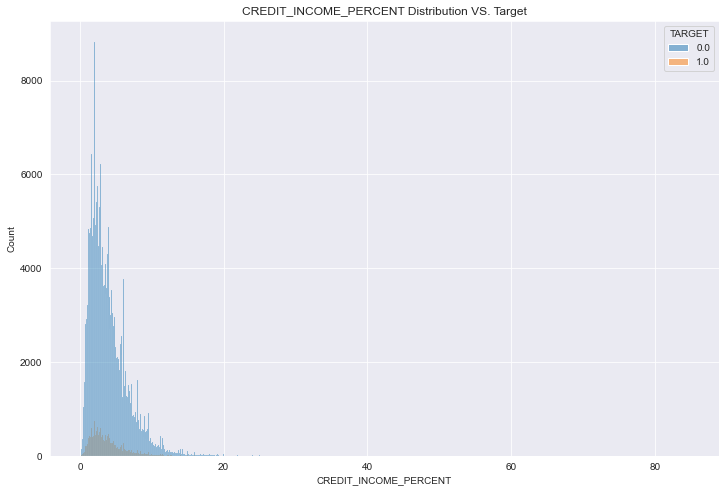

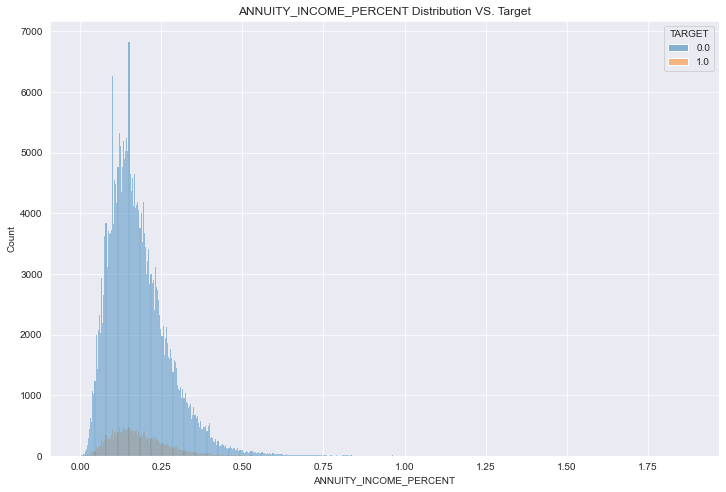

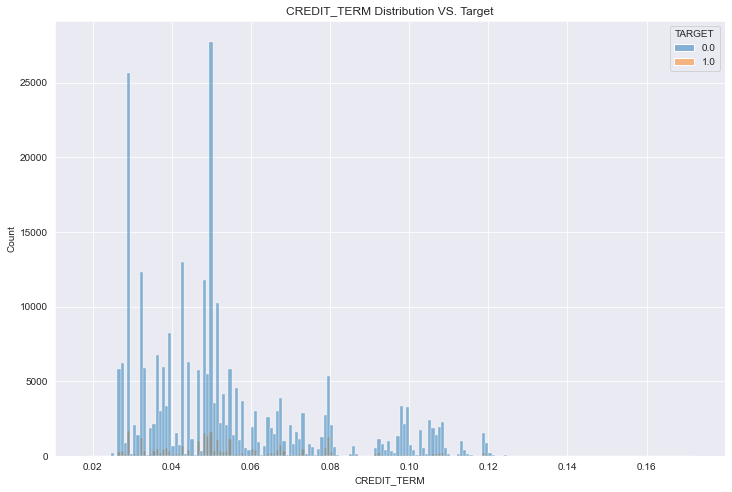

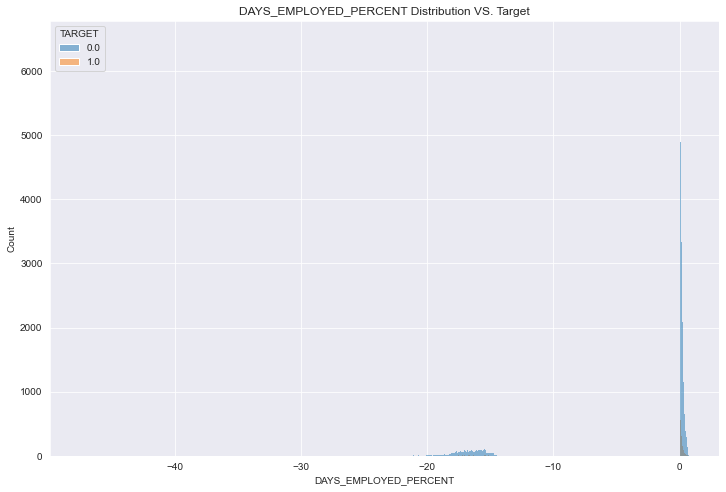

In [108]:
# Plot a list of the new features
for col in ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']:
    plt.figure(figsize=(12,8))
    sns.histplot(x= col,data=final_df,hue='TARGET')
    plt.title(f'{col} Distribution VS. Target')
    plt.show()

# Modeling

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

## Split the data into training and testing sets and validation set

In [110]:
# Assign the data to independent and dependent variables
X = final_df.drop(['TARGET'],axis=1)
y = final_df['TARGET']

In [111]:
# Split the data into training and testing sets and validation set
X_reminder,X_test,y_reminder,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [112]:
# Split the data into training sets and validation set
X_train,X_val,y_train,y_val = train_test_split(X_reminder,y_reminder,test_size=0.2,random_state=42,stratify=y_reminder)

In [113]:
# Check the shape of the datasets
X_train.shape,X_val.shape,X_test.shape

((196806, 259), (49202, 259), (61503, 259))

## Baseline Model - Decision Tree

In [114]:
# Create the StandardScaler() object to standardize the data
scaler = StandardScaler()
# Create the PCA object
pca = PCA()
# Create the DecisionTreeClassifier object
dt = DecisionTreeClassifier()

In [115]:
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('pca',pca),('dt',dt)])

In [116]:
# Set the number of components to be used in the PCA
n_components = np.arange(2,20,4)
# Set the max_depth to be used in the DecisionTreeClassifier
max_depth = np.arange(2,20,4)
params = {'pca__n_components':n_components,'dt__max_depth':max_depth}

In [117]:
# Create the GridSearchCV object and set the parameters to be used in the GridSearchCV object and cross-validation to be used in the GridSearchCV object
grid = GridSearchCV(pipe,params,cv=5,scoring= 'roc_auc',verbose = 10,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer

In [118]:
# Fit the GridSearchCV object to the training data
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 

In [ ]:
# Get the best estimator from the GridSearchCV object
best_est = grid.best_estimator_
best_est

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(y_train)
plt.show()

2## Ensemble Methods

### Bagging Method

In [ ]:
# Create the BaggingClassifier object
rf = RandomForestClassifier()
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('rf',rf)])
params = {'rf__n_estimators':np.arange(2,20,4)}
#
grid = GridSearchCV(pipe,params,cv=5,scoring= 'roc_auc',verbose = 5,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

In [ ]:
best_est = grid.best_estimator_
best_est

In [ ]:
# Create the BaggingClassifier object
rf = RandomForestClassifier(n_estimators=18)
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('rf',rf)])

In [ ]:
pipe.fit(X_train,y_train)
pipe.score(X_train,y_train)# rbose=1 to show the progress of the GridSearchCV object

In [ ]:
pipe.score(X_val,y_val)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
1print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support\n\n         0.0       0.92      1.00      0.96     56538\n         1.0       0.41      0.02      0.03      4965\n\n    accuracy                           0.92     61503\n   macro avg       0.67      0.51      0.50     61503\nweighted avg       0.88      0.92      0.88     61503\n'

###  Boosting Methods

## Final Model